In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('Опрос.xlsx')

Saving Опрос.xlsx to Опрос.xlsx


In [6]:
# Список нужных столбцов
needed_columns = [
    'Курение и употребление табака',
    'Употребление алкоголя',
    'Низкая физическая активность',
    'Загрязнённая окружающая среда (воздух, вода)',
    'Инфекции (например, ВПЧ, вирус гепатита B)',
    'Генетическая предрасположенность',
    'Психоэмоциональное состояние (длительный стресс, депрессия)',
    'Использование мобильных телефонов и Wi-Fi'
]

# Выбираем ТОЛЬКО эти столбцы
matrix_df = df[needed_columns]

# Сохраняем матрицу оценок в новый файл (или продолжаем анализ)
matrix_df.to_excel('матрица_оценок.xlsx', index=False)
from google.colab import files
files.download('матрица_оценок.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Здесь мы из таблицы, которая получилась на основе опроса выделяем матрицу оценок, то есть только оценки(ранги) студентов

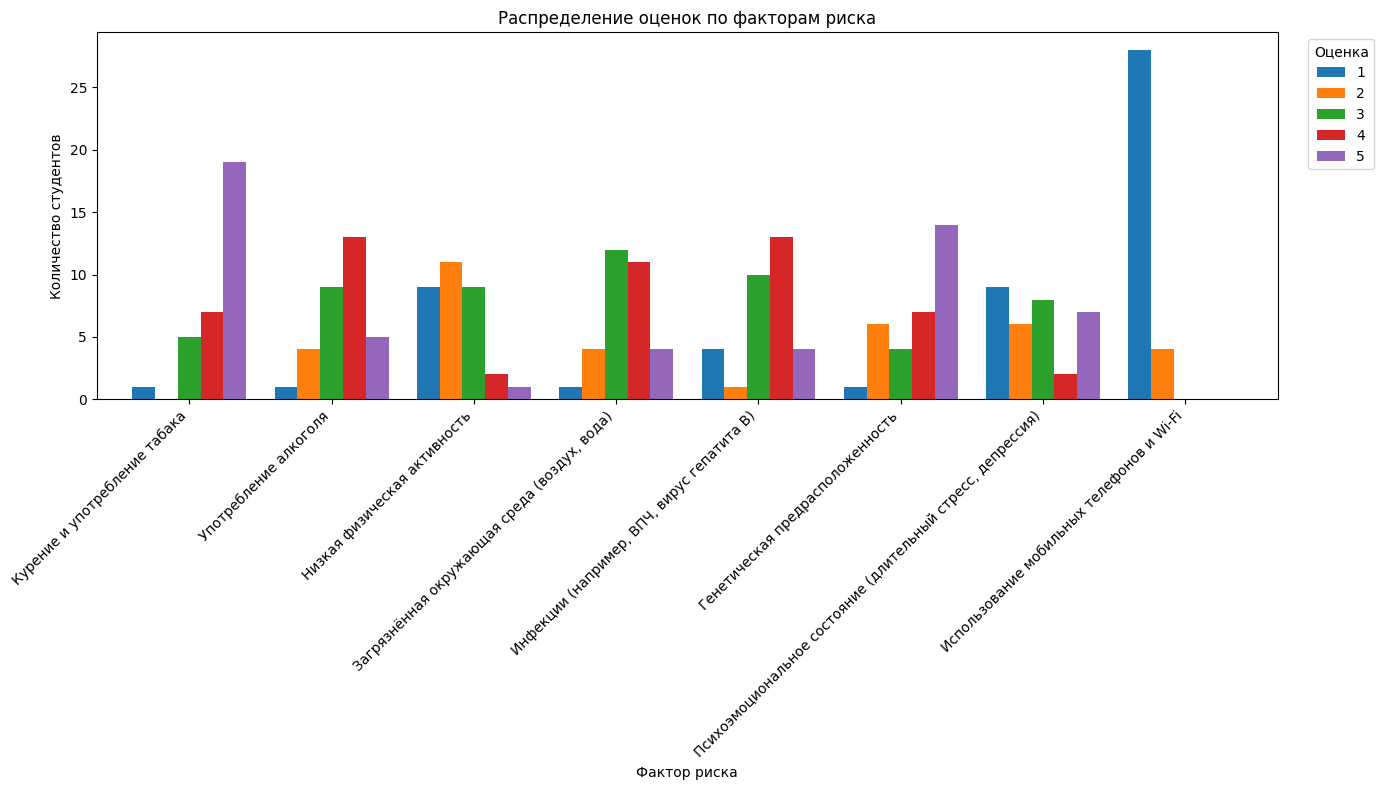

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('матрица_оценок.xlsx')

# Считаем, сколько раз встречается каждая оценка (1–5) по каждому фактору
counts = df.apply(lambda col: col.value_counts().reindex([1,2,3,4,5], fill_value=0))

# Строим график
ax = counts.T.plot(kind='bar', stacked=False, figsize=(14, 8), width=0.8)
ax.set_xlabel('Фактор риска')
ax.set_ylabel('Количество студентов')
ax.set_title('Распределение оценок по факторам риска')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Оценка', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

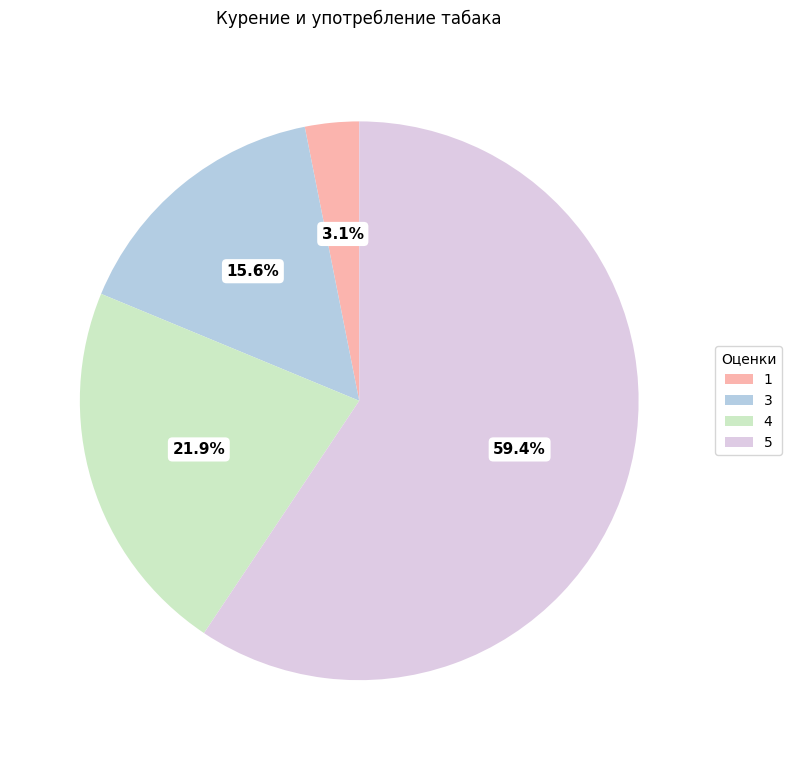

In [ ]:
factor = 'Курение и употребление табака'

# Считаем количество каждой оценки от 1 до 5
counts_full = df[factor].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# ОСТАВЛЯЕМ ТОЛЬКО ОЦЕНКИ С КОЛИЧЕСТВОМ > 0
counts = counts_full[counts_full > 0]

if counts.empty:
    print("Нет данных для построения диаграммы.")
else:
    colors = plt.cm.Pastel1(range(len(counts)))

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 11, 'weight': 'bold',
                   'bbox': dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='none')}
    )

    # Легенда — только реальные оценки (без нулей!)
    legend_labels = [f'{score}' for score in counts.index]
    plt.legend(wedges, legend_labels, title="Оценки", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title(f'{factor}', pad=20)
    plt.tight_layout()
    plt.show()

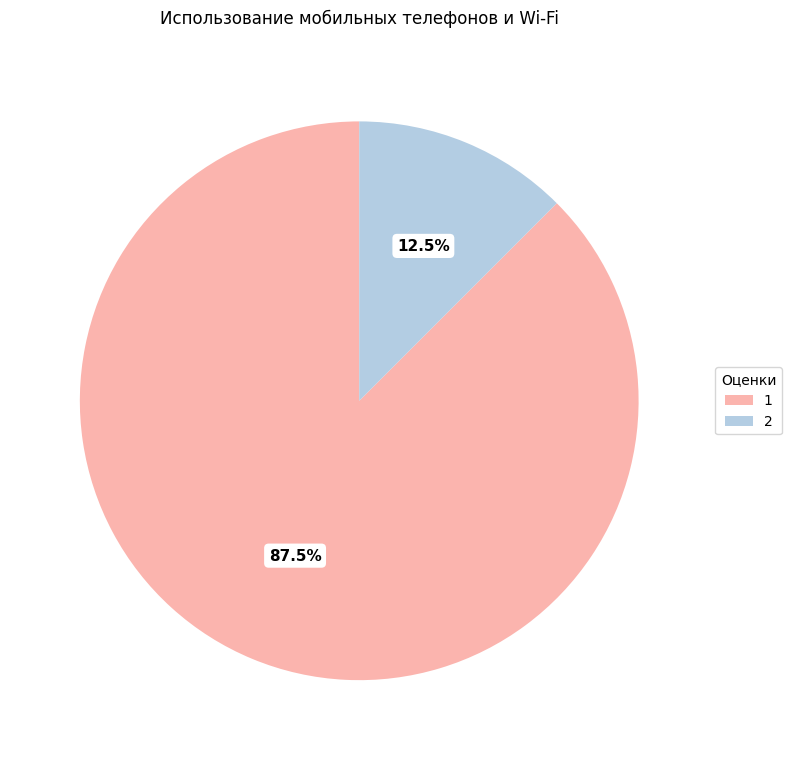

In [ ]:
factor = 'Использование мобильных телефонов и Wi-Fi'

# Считаем количество каждой оценки от 1 до 5
counts_full = df[factor].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# ОСТАВЛЯЕМ ТОЛЬКО ОЦЕНКИ С КОЛИЧЕСТВОМ > 0
counts = counts_full[counts_full > 0]

if counts.empty:
    print("Нет данных для построения диаграммы.")
else:
    colors = plt.cm.Pastel1(range(len(counts)))

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 11, 'weight': 'bold',
                   'bbox': dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='none')}
    )

    # Легенда — только реальные оценки (без нулей!)
    legend_labels = [f'{score}' for score in counts.index]
    plt.legend(wedges, legend_labels, title="Оценки", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title(f'{factor}', pad=20)
    plt.tight_layout()
    plt.show()

Представленные 3 графика, это просто визуализация. первый график - общее представление об оценках, второй и третий - визуализация самого высокого и низкого риска, на основе оценок

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

uploaded = files.upload()
df = pd.read_excel('Опрос.xlsx')
# Убедимся, что у нас только числовые данные и нужные столбцы
columns_order = [
    "Курение",
    "Генетика",
    "Экология",
    "Стресс",
    "Питание",
        "Физическая активность"
]

# Выбираем только нужные столбцы в указанном порядке
X = df[columns_order].values  # (m экспертов, n = 6 факторов)
m, n = X.shape

# Шаг 1: сумма рангов по каждому фактору
R = X.sum(axis=0)  # сумма рангов для каждого столбца

# Средняя сумма рангов при случайном ранжировании
R_mean = m * (n + 1) / 2

# Шаг 2: сумма квадратов отклонений
S = np.sum((R - R_mean) ** 2)

# Шаг 3: коэффициент конкордации Кендалла W
W = (12 * S) / (m**2 * (n**3 - n))

# Шаг 4: статистика хи-квадрат
chi2_stat = m * (n - 1) * W
p_value = 1 - chi2.cdf(chi2_stat, df=n - 1)

# Вывод результатов
print(f"Количество экспертов (студентов): {m}")
print(f"Количество факторов: {n}")
print(f"Коэффициент конкордации Кендалла W: {W:.4f}")
print(f"Хи-квадрат: {chi2_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("\nСогласованность мнений статистически значима (p < 0.05).")
else:
    print("\nСогласованность мнений НЕ является статистически значимой (p ≥ 0.05).")

# Интерпретация уровня согласованности
if W >= 0.8:
    conc = "очень высокий"
elif W >= 0.6:
    conc = "высокий"
elif W >= 0.4:
    conc = "умеренный"
elif W >= 0.2:
    conc = "низкий"
else:
    conc = "очень низкий"
print(f"Уровень согласованности: {conc}")

Saving Опрос.xlsx to Опрос (3).xlsx
Количество экспертов (студентов): 32
Количество факторов: 6
Коэффициент конкордации Кендалла W: 0.2227
Хи-квадрат: 35.6339
p-значение: 0.0000

Согласованность мнений статистически значима (p < 0.05).
Уровень согласованности: низкий


Задание 1.4, т.е проведение оценки согласованности

In [ ]:
import pandas as pd
import numpy as np

# Укажи явно, по каким факторам анализировать
factors_of_interest = [
    'Курение',
    'Питание',
    'Физическая активность',
    'Экология',
    'Генетика',
    'Стресс'
]

# 1. Средние и стандартные отклонения ТОЛЬКО по нужным столбцам
means = df[factors_of_interest].mean()
stds = df[factors_of_interest].std()

# 2. Научная "правда" (по данным ВОЗ / онкологии)
medical_truth = {
    'Курение': 1,
    'Питание': 1,
    'Физическая активность': 1,
    'Экология': 1,
    'Генетика': 1,
    'Стресс': 0.5  # возможная связь, но не главная
}

# 3. Определяем выбивающиеся объекты
outliers = []

for factor in factors_of_interest:
    mean_val = means[factor]
    std_val = stds[factor]
    truth = medical_truth[factor]

    # Критерий 1: несоответствие научным данным
    if truth == 1 and mean_val < 3.0:
        outliers.append((factor, "занижена значимость доказанного фактора"))
    elif truth == 0.5 and mean_val < 2.5:  # можно уточнить порог для "серых зон"
        # Опционально: добавить условие для 0.5, если нужно
        pass

    # Критерий 2: высокий разброс (>1.0 при шкале 1–5)
    if std_val > 1.0:
        outliers.append((factor, "высокий разброс мнений"))

# Убираем дубликаты (маловероятно, но на всякий случай)
outliers = list(dict.fromkeys(outliers))

# Вывод
print("Анализ выбивающихся объектов:")
for factor, reason in outliers:
    print(f"– {factor}: {reason} (среднее = {means[factor]:.2f}, σ = {stds[factor]:.2f})")

Анализ выбивающихся объектов:
– Курение: занижена значимость доказанного фактора (среднее = 2.03, σ = 1.56)
– Курение: высокий разброс мнений (среднее = 2.03, σ = 1.56)
– Питание: высокий разброс мнений (среднее = 3.75, σ = 1.48)
– Физическая активность: высокий разброс мнений (среднее = 4.56, σ = 1.83)
– Экология: высокий разброс мнений (среднее = 3.00, σ = 1.24)
– Генетика: высокий разброс мнений (среднее = 3.22, σ = 1.60)
– Стресс: высокий разброс мнений (среднее = 3.97, σ = 1.62)


Задание 2.3 - Проведение факторного анализа

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2, rankdata

uploaded = files.upload()
df = pd.read_excel('Опрос.xlsx')

# Укажите факторы
factors = ["Курение", "Генетика", "Экология", "Питание", "Стресс", "Физическая активность"]

# Проверка наличия столбцов
missing = [f for f in factors if f not in df.columns]
if missing:
    raise KeyError(f"Отсутствуют столбцы: {missing}")

df = df[factors].copy()
print(f"Исходно: {len(df)} экспертов\n")

# --- Функция расчёта W ---
def kendall_w(mat):
    m, n = mat.shape
    if m < 2: return np.nan, np.nan
    ranks = np.array([rankdata(row, method='average') for row in mat])
    R = ranks.sum(axis=0)
    S = ((R - m * (n + 1) / 2) ** 2).sum()
    W = (12 * S) / (m**2 * (n**3 - n))
    p = 1 - chi2.cdf(m * (n - 1) * W, df=n - 1)
    return W, p

# --- Шаг 1: исходный расчёт ---
W0, p0 = kendall_w(df.values)
print(f"До удаления: W = {W0:.4f}, p = {p0:.4f}")

# --- Шаг 2: найдём корреляции с групповым консенсусом ---
ranks_all = np.array([rankdata(row, method='average') for row in df.values])
R_sum = ranks_all.sum(axis=0)  # суммарные ранги по факторам

correlations = []
for r in ranks_all:
    if np.std(r) == 0 or np.std(R_sum) == 0:
        corr = 0.0
    else:
        corr = np.corrcoef(r, R_sum)[0, 1]
        if np.isnan(corr):
            corr = 0.0
    correlations.append(corr)

# --- Шаг 3: удалим всех с корреляцией ниже порога ---
threshold = 0.0  # ← МЕНЯЙТЕ ЭТОТ ПОРОГ: например, 0.1, 0.2, или даже -0.2
to_keep = [i for i, corr in enumerate(correlations) if corr >= threshold]
df_clean = df.iloc[to_keep].reset_index(drop=True)

print(f"\nУдалено экспертов с корреляцией < {threshold}: {len(df) - len(df_clean)} шт.")
print(f"Осталось: {len(df_clean)} экспертов")

# --- Шаг 4: пересчитаем W ---
W1, p1 = kendall_w(df_clean.values)
print(f"\nПосле удаления: W = {W1:.4f}, p = {p1:.4f}")
print(f"Изменение W: {W1 - W0:+.4f}")

# Уровень согласованности
W = W1
if W >= 0.8: conc = "очень высокий"
elif W >= 0.6: conc = "высокий"
elif W >= 0.4: conc = "умеренный"
elif W >= 0.2: conc = "низкий"
else: conc = "очень низкий"
print(f"Уровень согласованности: {conc}")

Saving Опрос.xlsx to Опрос (1).xlsx
Исходно: 32 экспертов

До удаления: W = 0.2206, p = 0.0000

Удалено экспертов с корреляцией < 0.0: 5 шт.
Осталось: 27 экспертов

После удаления: W = 0.4534, p = 0.0000
Изменение W: +0.2328
Уровень согласованности: умеренный


Задание 2.4, проведение анализа согласованности

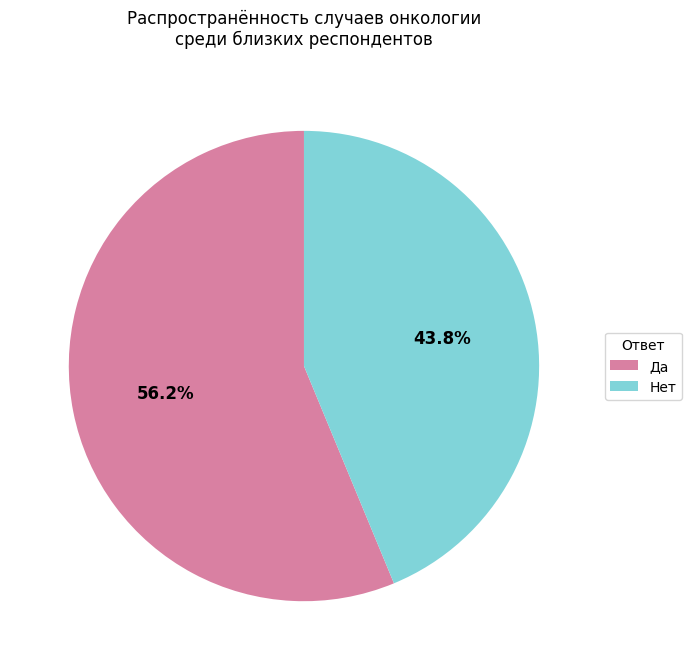

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Опрос.xlsx')

column_name = 'Были ли случаи онкологических заболеваний у ваших родственников или близких?'

counts = df[column_name].value_counts()
labels = ['Да', 'Нет']
sizes = [counts.get('Да', 0), counts.get('Нет', 0)]

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#d980a2', '#80d4d9'],
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Добавляем легенду СБОКУ
plt.legend(wedges, labels, title="Ответ", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Распространённость случаев онкологии\nсреди близких респондентов', pad=20)
plt.tight_layout()
plt.show()

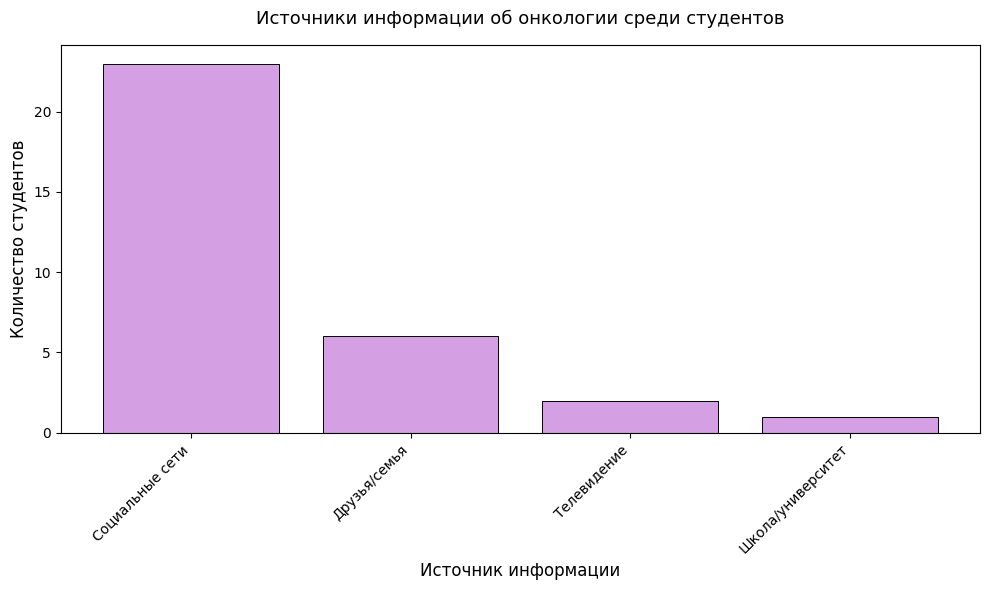

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Название столбца (точно как в таблице!)
column = 'Откуда вы чаще всего получаете информацию об онкологии?'

# Подсчёт количества ответов по каждому источнику
counts = df[column].value_counts()

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='#d49fe3', edgecolor='black', linewidth=0.7)

# Оформление
plt.xlabel('Источник информации', fontsize=12)
plt.ylabel('Количество студентов', fontsize=12)
plt.title('Источники информации об онкологии среди студентов', fontsize=13, pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

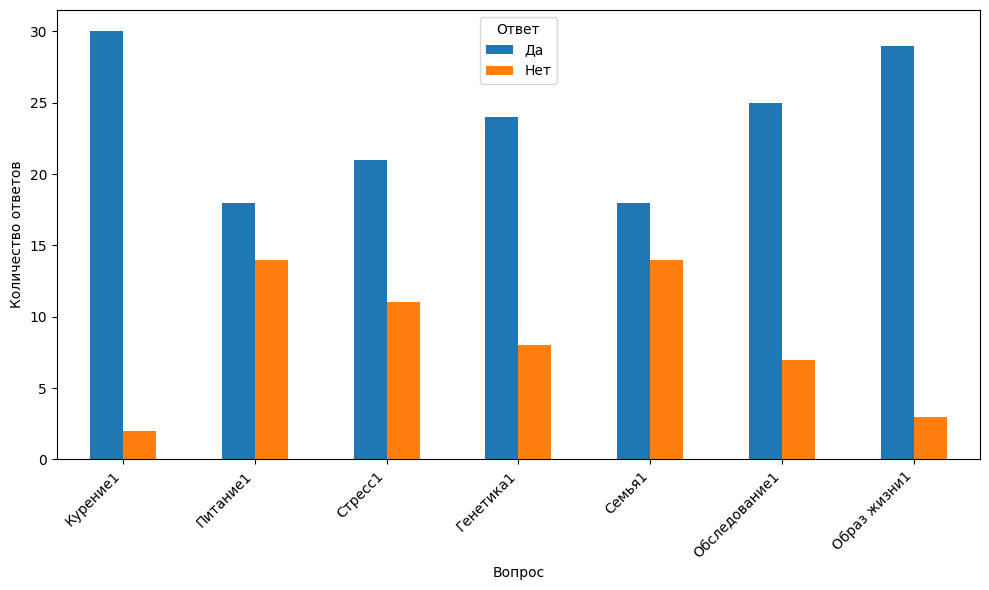

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_names = {
    'Считаете ли вы, что курение может вызвать онкологические заболевания?': 'Курение1',
    'Считаете ли вы, что неправильное питание связано с риском рака?': 'Питание1',
    'Думаете ли вы, что стресс может напрямую привести к развитию рака?': 'Стресс1',
    'Верите ли вы, что наследственность играет важную роль в возникновении рака?': 'Генетика1',
    'Были ли случаи онкологических заболеваний у ваших родственников или близких?': 'Семья1',
    'Готовы ли вы пройти бесплатное обследование на раннюю диагностику рака?': 'Обследование1',
    'Измените ли вы свой образ жизни, если узнаете о повышенном риске рака?': 'Образ жизни1'
}


# Применяем переименование столбцов
df_renamed = df[list(new_names.keys())].rename(columns=new_names)

# Считаем количество 'Да' и 'Нет' для каждого столбца
counts = df_renamed.apply(pd.Series.value_counts).fillna(0)

# Транспонируем для удобства построения: строки — вопросы, столбцы — 'Да'/'Нет'
counts = counts.T

# Строим график
counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Вопрос')
plt.ylabel('Количество ответов')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ответ')
plt.tight_layout()
plt.show()